

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [3]:
#import tool to embed GoogleDoc table
from IPython.display import IFrame

#link of the table
url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1"

#render table with given dimensions
IFrame(url,860,500)



## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

### Question 2 a & b


In [5]:
# importing all system providers
%matplotlib inline
import matplotlib.pyplot as plt
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import seaborn as sns  # This allows us to efficiently and beautifully plot

#loading the data, assigning the right index columns, the correct header and skipping last row 
TOTAL_Casualities = 'data/Afghanistan.csv'
db = pd.read_csv(TOTAL_Casualities, index_col=['Year', 'Month'], header=1, skipfooter=1, engine="python")
db.head()

Taliban  Civilians  Afghan forces  \
Year Month                                         
2004 January      15.0         51           23.0   
     February      NaN          7            4.0   
     March        19.0          2            NaN   
     April         5.0          3           19.0   
     May          18.0         29           56.0   

               Nato (detailed in spreadsheet)  Nato - official figures  
Year Month                                                              
2004 January                              NaN                       11  
     February                             5.0                        2  
     March                                2.0                        3  
     April                                NaN                        3  
     May                                  6.0                        9

### Question 2c

In [7]:
""" we chose this code since it clear and concise, all names are simple
and the for loop is efficient and readable"""

# assigning columns and creating dictionary
columns = db.columns
print(columns)
dict = {}

# loops over columns, assigning values to the keys
for i in range(len(columns)):
    dict[columns[i]] = db[columns[i]].iloc[0]
    
dict


Index(['Taliban', 'Civilians', 'Afghan forces',
       'Nato (detailed in spreadsheet)', 'Nato - official figures'],
      dtype='object')


{'Taliban': np.float64(15.0),
 'Civilians': np.int64(51),
 'Afghan forces': np.float64(23.0),
 'Nato (detailed in spreadsheet)': np.float64(nan),
 'Nato - official figures': np.int64(11)}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

### Question 3a

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

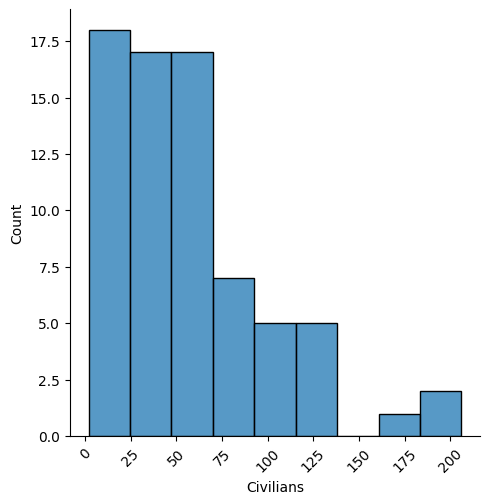

In [8]:
# creating histogram of Civilians column
histo = sns.displot(db['Civilians'])

plt.xticks(rotation=45, fontsize=10) # Rotate labels by 45 degrees


### Question 3b

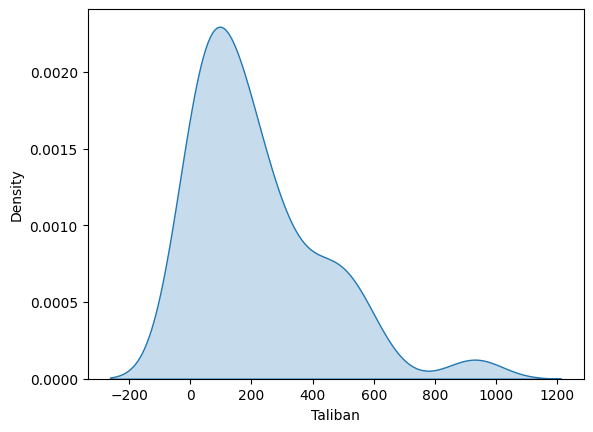

In [9]:
# plot a KDE of Taliban column
# Converts to numeric, coercing errors to NaN
db['Taliban'] = pd.to_numeric(db['Taliban'], errors='coerce')

histo2 = sns.kdeplot(db['Taliban'], fill=True)



### Question 3c

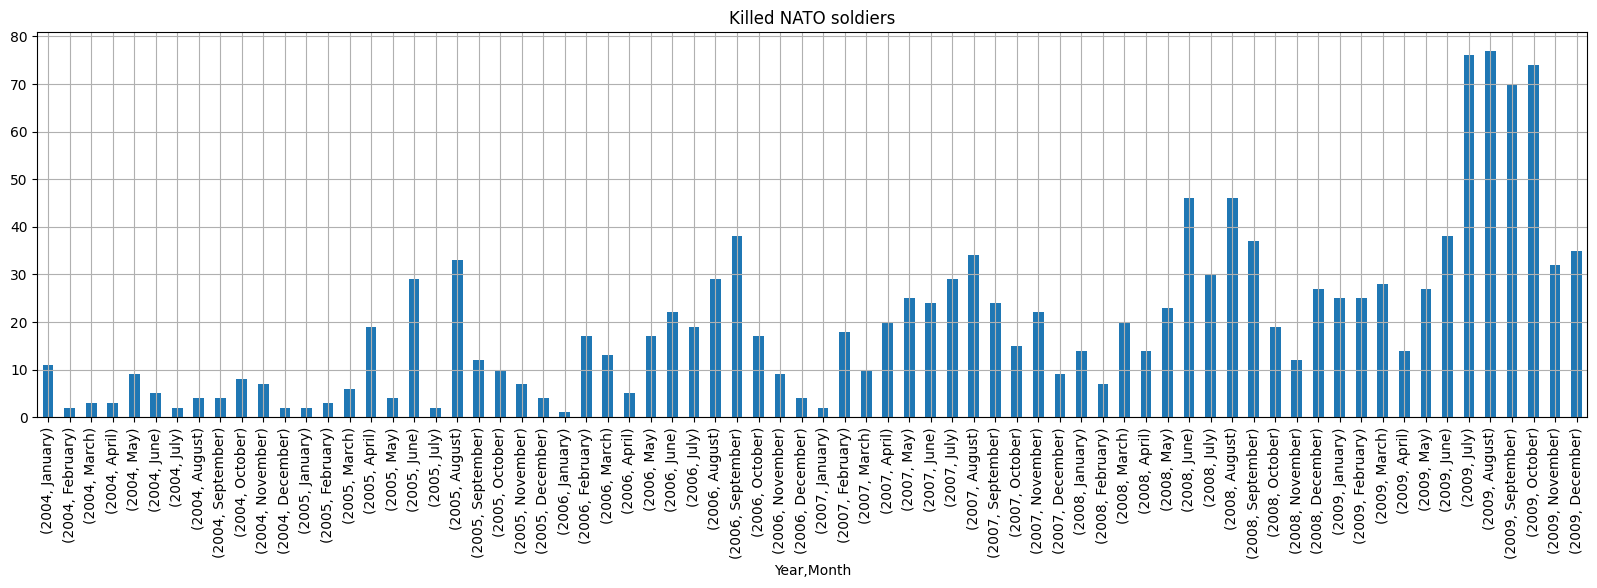

In [10]:
#plot vertical bar diagram
bars_vertical = db['Nato - official figures'].plot(kind='bar', figsize=(20,5),grid=True,title="Killed NATO soldiers")

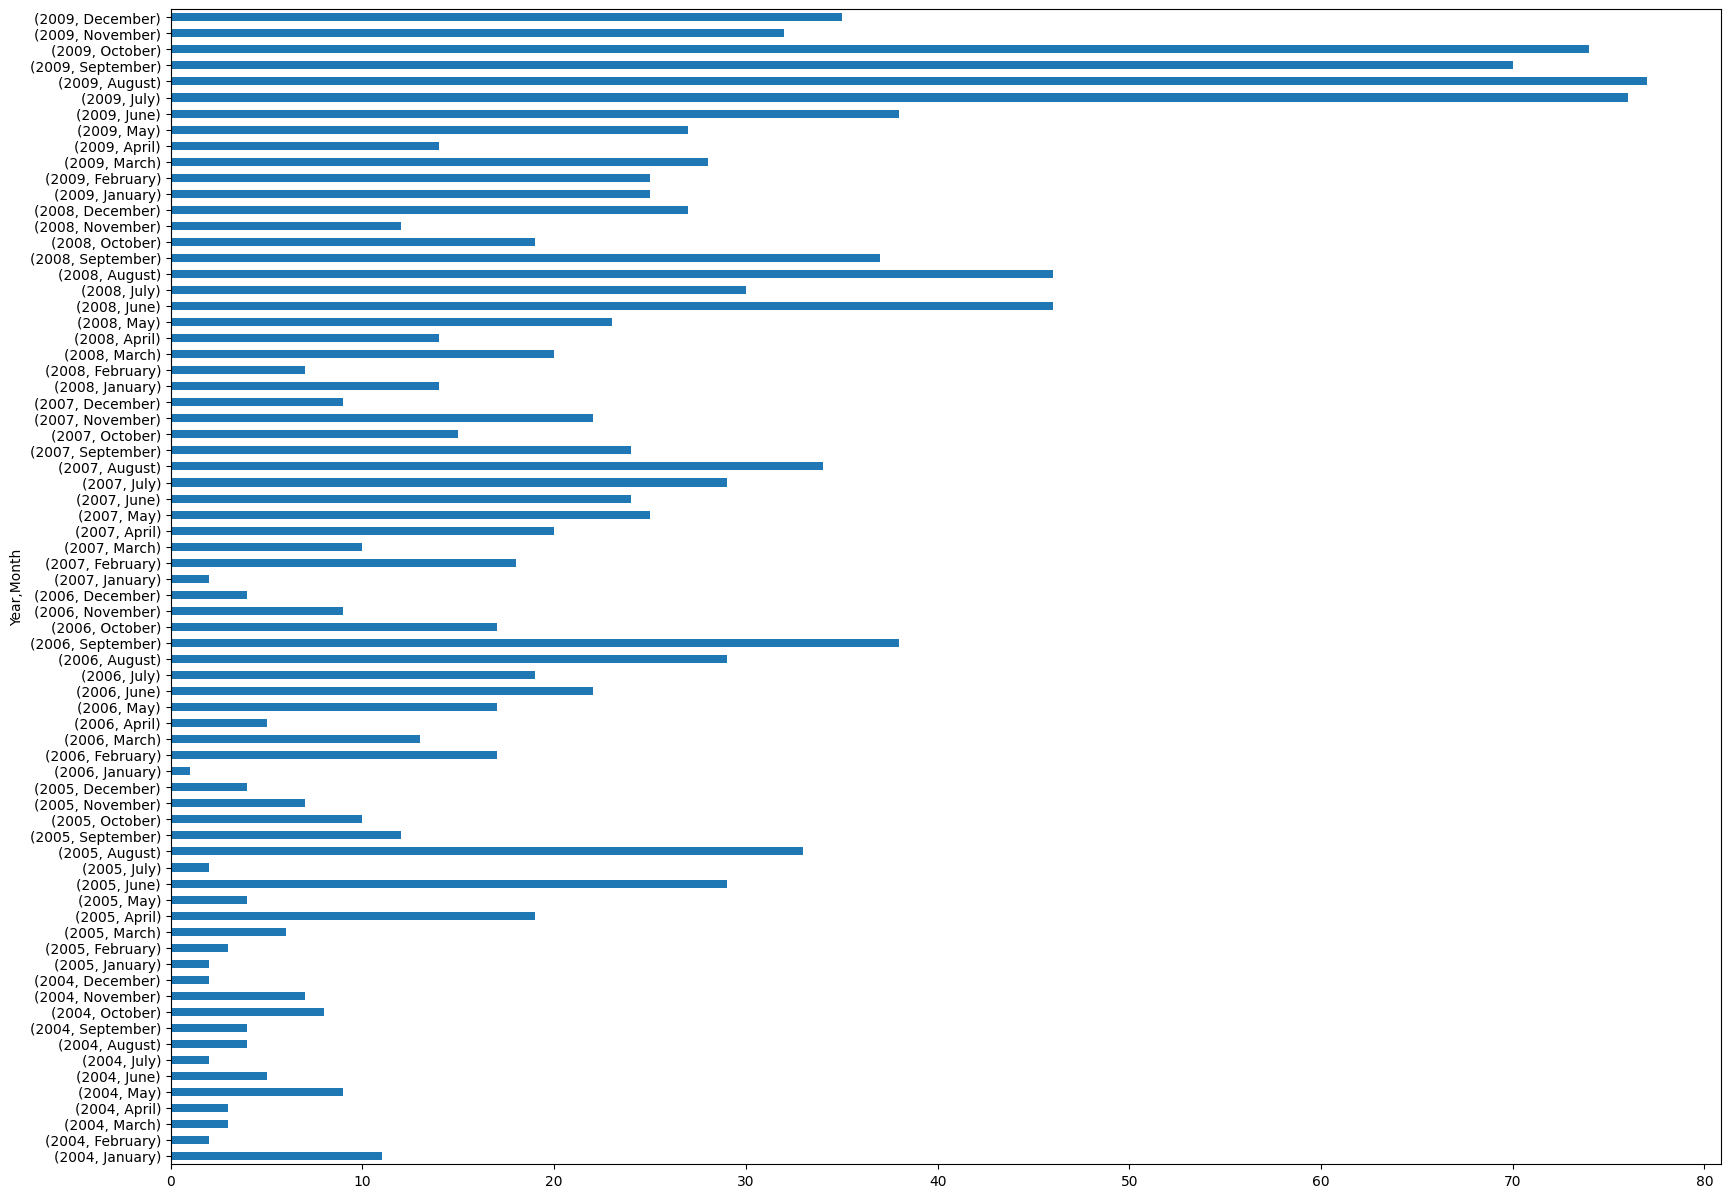

In [11]:
#plot horizontal bar diagram
bars_horizontal = db['Nato - official figures'].plot(kind='barh', figsize=(20, 15))

Discussion:
Considering the data is sorted by time (year and month) by default, neither of the two plots seem to be appropriate to communicate the data.
A (personal) perceived effect the horizontal diagram has, is that it makes the differences between the bars seem more dramatic, than the vertical diagram. Of course, figsize can be changed in both, but when stretching the first diagram, the manipulation seems more obvious. With the horizonal bars the expanded dimensions seem more natural, when looked at the problem with Mark Twain's glasses.

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [13]:
""" This is code is chosen since it was the most readable, every line contains to-the-point code, 
which makes it easy understandable. """
# for loop checks for every index, the whole row, all 'Taliban' rows are printed
for index, row in db.iterrows():
   print(row['Taliban'])

#changes values to numeric
db['Taliban'] = pd.to_numeric(db['Taliban'], errors='coerce')

# creating a list to store filtered list
tali_list = []

# creating threshold value
threshold = 100

# loops through every index,row and adds all taliban rows which are not NA and above threshold to list
for index, row in db.iterrows():
    if pd.notna(row['Taliban']) and row['Taliban'] > threshold:
        tali_list.append(row)

#creating the dataframe
tali_data = pd.DataFrame(tali_list)
    
tali_data






15.0
nan
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0


Taliban  Civilians  Afghan forces  \
2004 June         163.0       32.0           14.0   
2005 April        118.0        5.0            4.0   
     May          113.0       49.0           25.0   
     June         143.0       31.0            4.0   
     October      122.0       15.0           10.0   
2006 June         295.0       71.0           39.0   
     July         220.0       64.0           36.0   
     August       161.0      101.0           42.0   
     September    945.0      172.0           97.0   
     October      333.0       44.0           70.0   
     November     325.0       46.0           14.0   
     December     216.0       51.0           36.0   
2007 January      125.0       53.0           49.0   
     February     152.0       33.0           35.0   
     April        166.0      123.0           68.0   
     May          199.0       71.0          125.0   
     June         564.0       80.0           98.0   
     July         485.0       83.0          114.0   
     August       551.0       65.0           89.0   
     September    917.0       64.0          144.0   
     October      462.0       46.0           75.0   
     November     270.0       60.0           67.0   
     December     172.0       37.0           55.0   
2008 February     139.0      120.0           35.0   
     April        128.0       55.0           86.0   
     May          177.0       54.0           65.0   
     June         306.0       51.0           58.0   
     July         303.0      120.0          100.0   
     August       326.0       46.0           61.0   
     September    142.0       63.0           57.0   
     October      485.0       56.0           54.0   
     November     479.0       78.0           68.0   
     December     223.0       76.0           52.0   
2009 January      185.0       31.0           34.0   
     February     209.0       46.0           69.0   
     March        202.0       64.0           94.0   
     April        240.0       44.0           73.0   
     May          406.0      109.0          118.0   
     June         526.0      111.0          133.0   
     July         557.0      119.0           80.0   
     August       445.0      206.0          190.0   
     September    614.0      197.0          133.0   
     October      462.0      107.0           86.0   
     November     410.0      120.0           69.0   
     December     287.0       87.0           65.0   

                Nato (detailed in spreadsheet)  Nato - official figures  
2004 June                                  2.0                      5.0  
2005 April                                 2.0                     19.0  
     May                                   4.0                      4.0  
     June                                 24.0                     29.0  
     October                               3.0                     10.0  
2006 June                                 19.0                     22.0  
     July                                 13.0                     19.0  
     August                               18.0                     29.0  
     September                            19.0                     38.0  
     October                              17.0                     17.0  
     November                              5.0                      9.0  
     December                              3.0                      4.0  
2007 January                               1.0                      2.0  
     February                              6.0                     18.0  
     April                                26.0                     20.0  
     May                                  19.0                     25.0  
     June                                 27.0                     24.0  
     July                                 25.0                     29.0  
     August                               31.0                     34.0  
     September                            20.0                     24.0  
     October           

## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


                Civilians  Afghan forces
Year Month                              
2004 January           51           23.0
     February           7            4.0
     March              2            NaN
     April              3           19.0
     May               29           56.0
...                   ...            ...
2009 August           206          190.0
     September        197          133.0
     October          107           86.0
     November         120           69.0
     December          87           65.0

[72 rows x 2 columns]
Year  Month    
2004  January       74.0
      February      11.0
      March          2.0
      April         22.0
      May           85.0
                   ...  
2009  August       396.0
      September    330.0
      October      193.0
      November     189.0
      December     152.0
Length: 72, dtype: float64


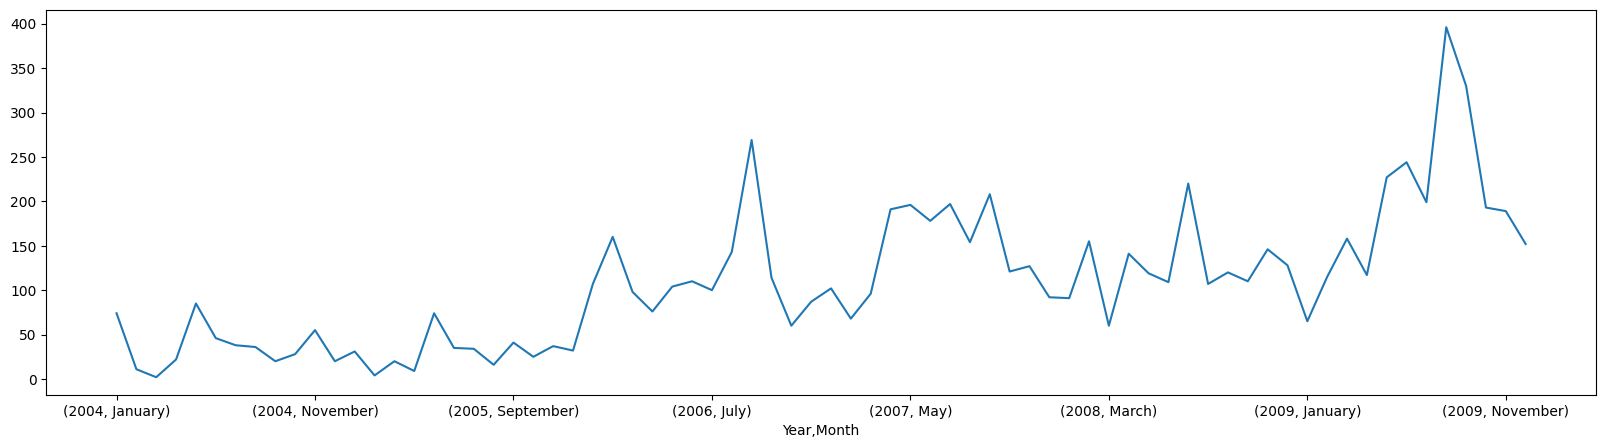

In [18]:
""" This is code is chosen for its efficientcy and simplicity. The lines are short and not complicated."""
#creating a list containing two correct columns
#very simple line of code, this works since index_col =  'Year' and 'Month'
names = ['Civilians', 'Afghan forces']
civ_afg = db[names]
print(civ_afg)


# adding the columns, filling NaN values with 0 to avoid issues with missing data
total = db['Civilians'].fillna(0) + db['Afghan forces'].fillna(0)

print(total)

# creating  a lineplot
line1 = total.plot.line(figsize= (20, 5))



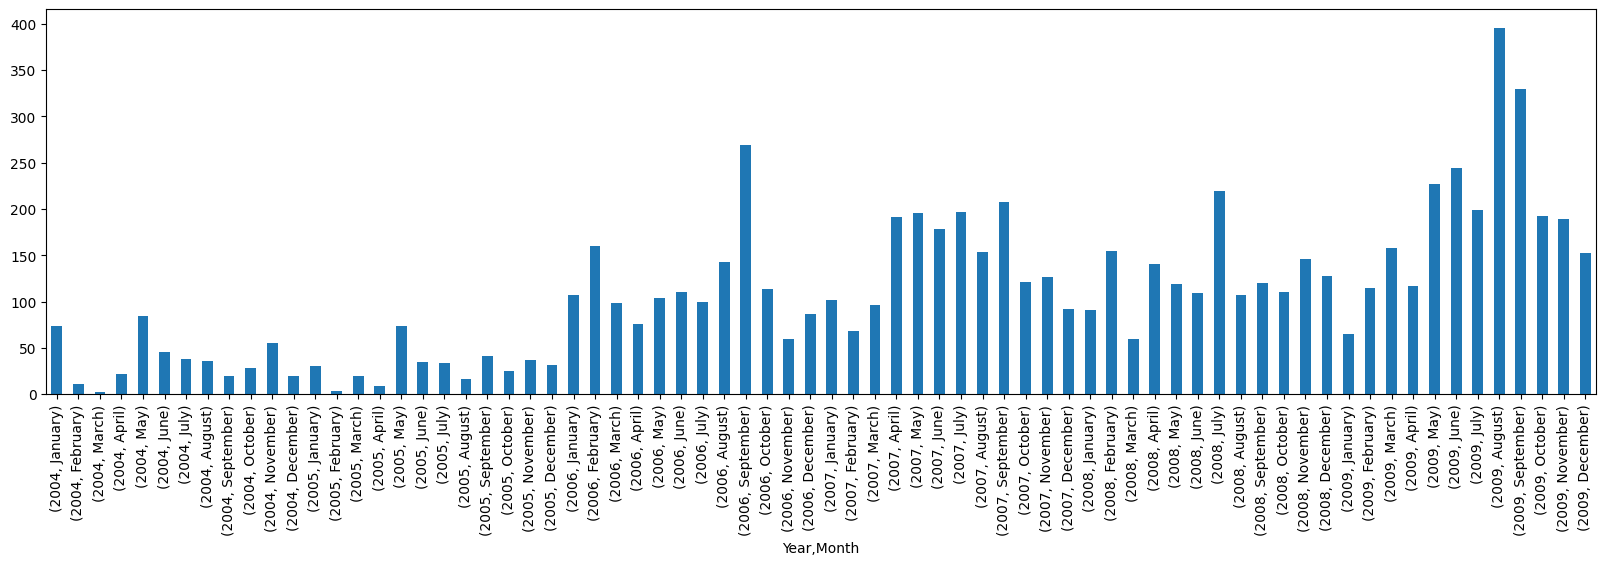

In [17]:
#creating a bar plot
bar1 = total.plot.bar(figsize= (20, 5))
